In [1]:
%pip install pycaret

     -------------------------------------- 484.4/484.4 kB 3.8 MB/s eta 0:00:00
     -------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 572.7/572.7 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 65.9/65.9 MB 650.2 kB/s eta 0:00:00
     -------------------------------------- 73.4/73.4 kB 809.3 kB/s eta 0:00:00
     ------------------------------------ 235.6/235.6 kB 320.6 kB/s eta 0:00:00
     ------------------------------------ 106.8/106.8 kB 128.8 kB/s eta 0:00:00
     ------------------------------------ 302.2/302.2 kB 668.1 kB/s eta 0:00:00
     ------------------------------------ 153.4/153.4 kB 761.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 81.8/81.8 kB 511.4 kB/s eta 0:00:00
     -------------

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from pycaret.classification import *

## Section I: Summary of Data Treatment

In [4]:
file_path = 'data/subset_three_targets.csv'

# Load the file 
df = pd.read_csv(file_path)

In [5]:
# Create ADULT dataframe (CATAG3 == 2, 3, or 4)
ADULT = df[df['CATAG3'].isin([2,3,4])]

# Drop the YODSMMDE and DEP columns from ADULT dataframe
ADULT = ADULT.drop(['YODSMMDE', 'DEP'], axis=1)

# Create YOUTH dataframe (CATAG3 == 1)
YOUTH = df[df['CATAG3'].isin([1])]

# Drop the ADSMMDEA and DEP columns from YOUTH dataframe
YOUTH = YOUTH.drop(['ADSMMDEA', 'DEP'], axis=1)

In [6]:
# import pycaret classification and init setup
s = setup(ADULT, target = 'ADSMMDEA', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ADSMMDEA
2,Target type,Binary
3,Original data shape,"(33177, 16)"
4,Transformed data shape,"(33177, 16)"
5,Transformed train set shape,"(23223, 16)"
6,Transformed test set shape,"(9954, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [7]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [9]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [8]:
# init setup on exp
exp.setup(ADULT, target = 'ADSMMDEA', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ADSMMDEA
2,Target type,Binary
3,Original data shape,"(33177, 16)"
4,Transformed data shape,"(33177, 16)"
5,Transformed train set shape,"(23223, 16)"
6,Transformed test set shape,"(9954, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [9]:
# Compare baseline models
best = compare_models()

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [10]:
# Compare models using OOP
exp.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:19:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7820,0.6947,0.0886,0.5592,0.1528,0.0979,0.1545,0.0410
lr,Logistic Regression,0.7816,0.6910,0.0869,0.5491,0.1498,0.0953,0.1502,0.0380
ada,Ada Boost Classifier,0.7816,0.6913,0.0902,0.5475,0.1546,0.0984,0.1525,0.0410
ridge,Ridge Classifier,0.7806,0.0000,0.0508,0.5637,0.0931,0.0586,0.1172,0.0350
lda,Linear Discriminant Analysis,0.7806,0.6913,0.1113,0.5263,0.1835,0.1152,0.1624,0.0380
lightgbm,Light Gradient Boosting Machine,0.7792,0.6880,0.1108,0.5132,0.1821,0.1121,0.1570,0.0460
dummy,Dummy Classifier,0.7780,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
rf,Random Forest Classifier,0.7613,0.6417,0.1757,0.4116,0.2462,0.1308,0.1476,0.0850
et,Extra Trees Classifier,0.7597,0.6221,0.1738,0.4039,0.2429,0.1264,0.1423,0.1070
knn,K Neighbors Classifier,0.7526,0.6133,0.1688,0.3738,0.2324,0.1093,0.1217,0.0990


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

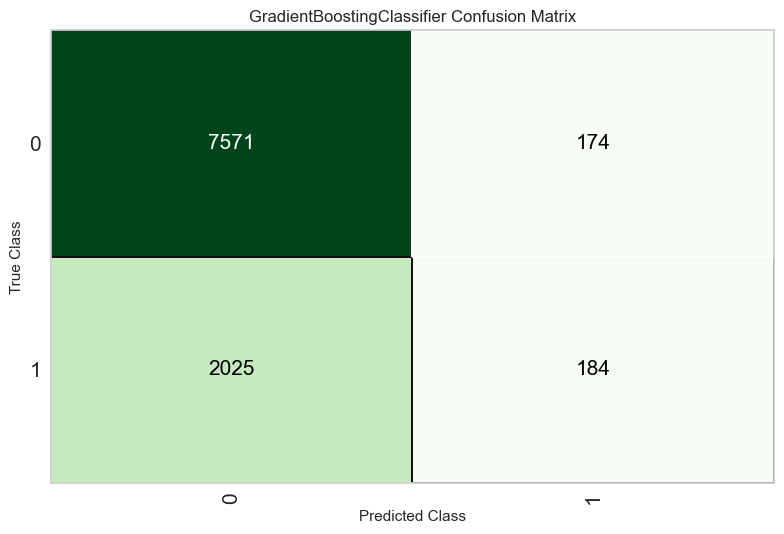

In [11]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

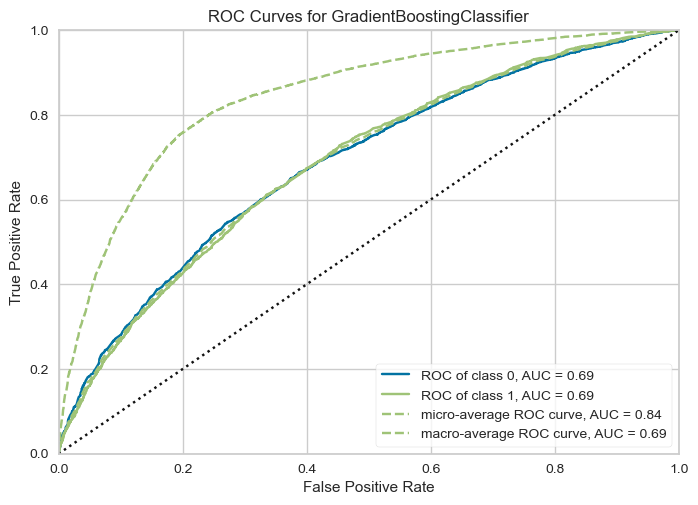

In [12]:
# plot AUC
plot_model(best, plot = 'auc')

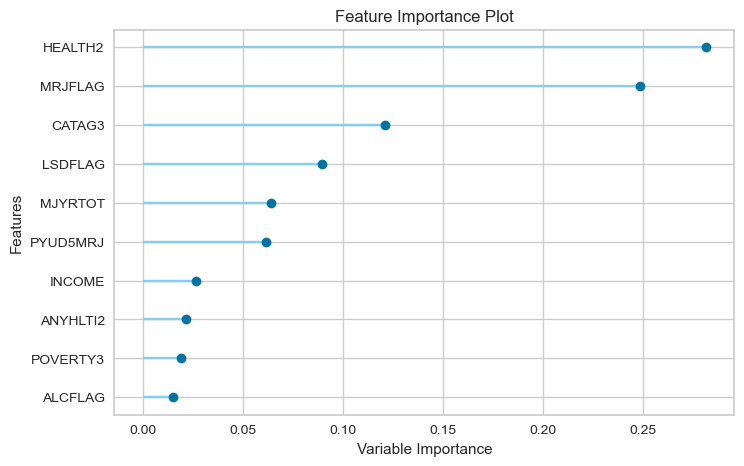

In [13]:
# plot feature importance
plot_model(best, plot = 'feature')

In [14]:
### Section II: YOUTH

In [15]:
# import pycaret classification and init setup
s = setup(YOUTH, target = 'YODSMMDE', session_id = 123)

,Description,Value
0,Session id,123
1,Target,YODSMMDE
2,Target type,Binary
3,Original data shape,"(10241, 16)"
4,Transformed data shape,"(10241, 16)"
5,Transformed train set shape,"(7168, 16)"
6,Transformed test set shape,"(3073, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [16]:
# Instatiate an experiment
exp = ClassificationExperiment()

In [17]:
# init setup on exp
exp.setup(YOUTH, target = 'YODSMMDE', session_id = 123)

,Description,Value
0,Session id,123
1,Target,YODSMMDE
2,Target type,Binary
3,Original data shape,"(10241, 16)"
4,Transformed data shape,"(10241, 16)"
5,Transformed train set shape,"(7168, 16)"
6,Transformed test set shape,"(3073, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [18]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7631,0.6859,0.1609,0.6012,0.2530,0.1645,0.2160,0.0820
lr,Logistic Regression,0.7614,0.6865,0.1508,0.5952,0.2394,0.1535,0.2055,0.0540
ridge,Ridge Classifier,0.7612,0.0000,0.1430,0.5979,0.2297,0.1470,0.2009,0.0380
lda,Linear Discriminant Analysis,0.7593,0.6868,0.1782,0.5621,0.2688,0.1691,0.2099,0.0450
ada,Ada Boost Classifier,0.7589,0.6850,0.1441,0.5746,0.2297,0.1434,0.1927,0.0720
lightgbm,Light Gradient Boosting Machine,0.7553,0.6773,0.1877,0.5358,0.2767,0.1682,0.2027,0.1390
qda,Quadratic Discriminant Analysis,0.7503,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0420
dummy,Dummy Classifier,0.7503,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0530
et,Extra Trees Classifier,0.7494,0.6436,0.1816,0.5031,0.2656,0.1524,0.1822,0.1060
rf,Random Forest Classifier,0.7482,0.6608,0.1911,0.4917,0.2737,0.1562,0.1822,0.0980


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

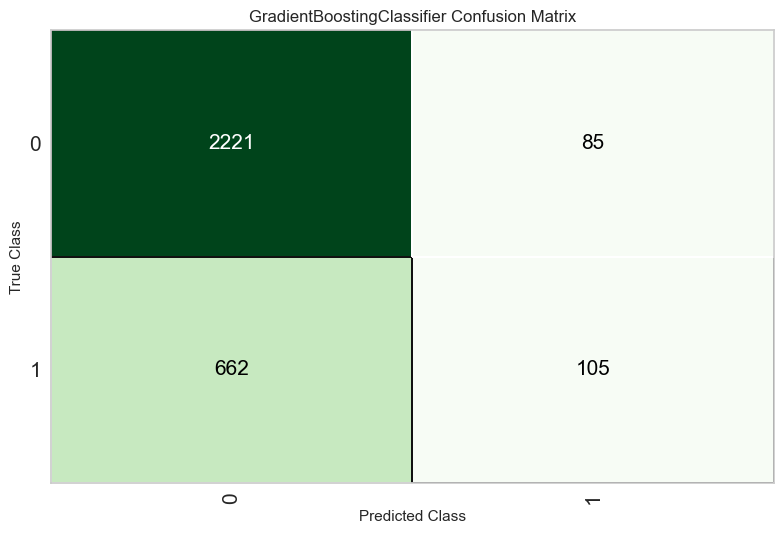

In [19]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

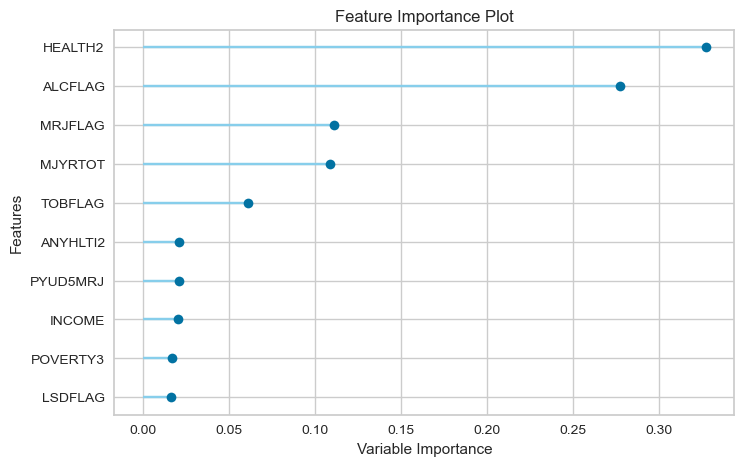

In [21]:
# plot feature importance
plot_model(best, plot = 'feature')

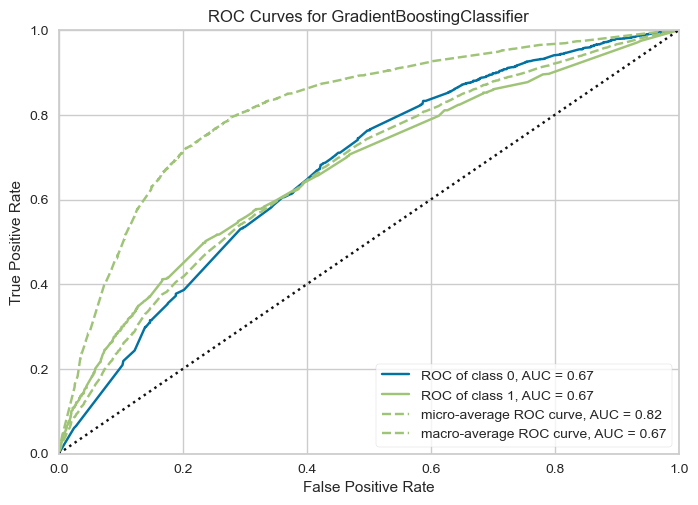

In [20]:
# plot AUC
plot_model(best, plot = 'auc')